In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


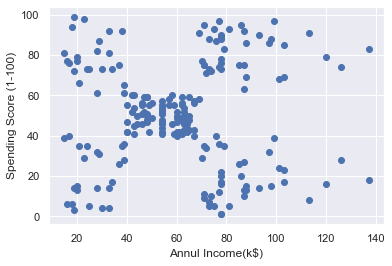

In [20]:
sns.set()
plt.xlabel('Annul Income(k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [15]:
sse = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
    
print(sse)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25043.890043290034, 21841.978256748636, 19740.7240824393]


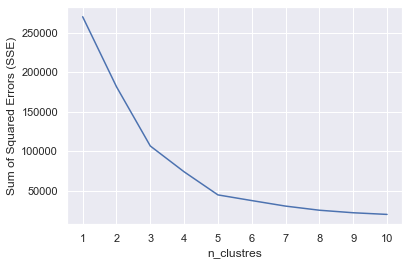

In [19]:
sns.set()
plt.xlabel('n_clustres')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1,11))
plt.plot(range(1,11), sse)

In [30]:
km = KMeans(n_clusters=5, init = 'k-means++', random_state=0)

In [35]:
predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted[:5]

array([4, 3, 4, 3, 4])

In [37]:
df['cluster'] = predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [77]:
clust_centres = km.cluster_centers_

print(clust_centres)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


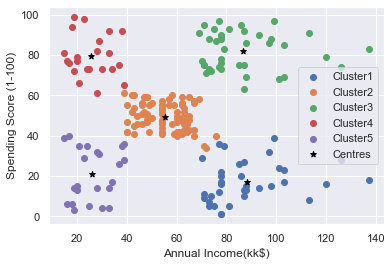

In [81]:
colors = ['red', 'green', 'blue,' 'purple', 'orange']

plt.xlabel('Annual Income(kk$)')
plt.ylabel('Spending Score (1-100)')
for i in range(5):
    plt.scatter(df[df['cluster'] == i]['Annual Income (k$)'], df[df['cluster'] == i]['Spending Score (1-100)'],
            cmap = colors,label=f"Cluster{i+1}")

plt.scatter(clust_centres[:,0], clust_centres[:,1], marker = '*', color = 'black', label = 'Centres')

plt.legend()